In [1]:
!huggingface-cli login --token ْXXXX

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
The token `read` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `read`


In [ ]:
import pandas as pd

# إنشاء بيانات العلماء واختراعاتهم
data = {
"World": [
"Thomas Edison", "Nikola Tesla", "Alexander Graham Bell", "James Watt", "Guglielmo Marconi",
"The Wright Brothers", "Louis Pasteur", "Michael Faraday", "Albert Einstein", "Isaac Newton"
],
"Invention": [
"Electric light bulb", "Alternating current", "Telephone", "Steam engine", "Radio",
"Airplane", "Pasteurization", "Electric motor", "Theory of relativity", "Laws of motion and gravitation"
]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# حفظها كملف CSV
csv_filename = "/mnt/data/scientists_inventions.csv"
df.to_csv(csv_filename, index=False, encoding="utf-8")

# إرجاع اسم الملف
csv_filename


In [3]:
%cd /content

/content


In [5]:
import pandas as pd

# إنشاء بيانات العلماء واختراعاتهم
data = {
    "World": [
        "Thomas Edison", "Nikola Tesla", "Alexander Graham Bell", "James Watt", "Guglielmo Marconi",
        "The Wright Brothers", "Louis Pasteur", "Michael Faraday", "Albert Einstein", "Isaac Newton"
    ],
    "Invention": [
        "Electric light bulb", "Alternating current", "Telephone", "Steam engine", "Radio",
        "Airplane", "Pasteurization", "Electric motor", "Theory of relativity", "Laws of motion and gravitation"
    ]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# حفظها كملف CSV
csv_filename = "/content/scientists_inventions.csv"
df.to_csv(csv_filename, index=False, encoding="utf-8")

# إرجاع اسم الملف
csv_filename

'/content/scientists_inventions.csv'

In [ ]:
import pandas as pd
import os
from pandasai import SmartDataframe
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
import tempfile

# تحميل النموذج المحلي
MODEL_PATH = "path/to/llama-3.2"  # استبدل بمسار النموذج

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForCausalLM.from_pretrained(MODEL_PATH).to(device)

def chat_with_llm(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=200)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# تحميل البيانات
DATASET_PATH = "./source/test.csv"  # استبدل بمسار الملف الفعلي
df = pd.read_csv(DATASET_PATH)

# عرض معلومات البيانات
print("Dataset Metadata")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Column Names: {', '.join(df.columns)}")
print("\nDataset Preview")
print(df.head(10))

# تحويل البيانات إلى SmartDataFrame
chat_df = SmartDataframe(df)

# إدخال سؤال المستخدم
while True:
    user_query = input("Enter your question about the dataset (or type 'exit' to quit): ")
    if user_query.lower() == 'exit':
        break
    try:
        response = chat_df.chat(user_query)
        print("Response:", response)
    except Exception as e:
        print("Error:", e)

# توليد رسم بياني بناءً على استعلام المستخدم
plot_query = input("Enter a query to generate a graph (or press Enter to skip): ")
if plot_query:
    try:
        with tempfile.TemporaryDirectory() as temp_dir:
            chat_df.chat(plot_query)
            temp_plot_path = os.path.join(temp_dir, "plot.png")
            plt.savefig(temp_plot_path)
            print(f"Plot saved at {temp_plot_path}")
    except Exception as e:
        print("Error generating plot:", e)


In [7]:
!pip install pandasai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install -r a.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successf

In [2]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio

  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 966.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:0

In [2]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torc

In [ ]:
import pandas as pd

# إنشاء البيانات
data = {
    "World": [
        "Thomas Edison", "Nikola Tesla", "Alexander Graham Bell",
        "James Watt", "Guglielmo Marconi", "The Wright Brothers",
        "Louis Pasteur", "Michael Faraday", "Albert Einstein",
        "Isaac Newton"
    ],
    "Invention": [
        "Electric light bulb", "Alternating current", "Telephone",
        "Steam engine", "Radio", "Airplane",
        "Pasteurization", "Electric motor", "Theory of relativity",
        "Laws of motion and gravitation"
    ]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# حفظ الملف بصيغة CSV
csv_filename = "scientists_inventions.csv"
df.to_csv(csv_filename, index=False, encoding="utf-8")

# طباعة المسار بعد الحفظ
print(f"تم إنشاء ملف CSV بنجاح: {csv_filename}")


In [ ]:
a.txt
matplotlib
openai
pandas
pandasai>=2.0.0
openpyxl
langchain
langchain-community
langchain-openai
langchain-groq
openai
faiss-cpu
plotly
datasets

In [ ]:
/content/scientists_inventions.csv
World	Invention
Thomas Edison	Electric light bulb
Nikola Tesla	Alternating current
Alexander Graham Bell	Telephone
James Watt	Steam engine
Guglielmo Marconi	Radio
The Wright Brothers	Airplane
Louis Pasteur	Pasteurization
Michael Faraday	Electric motor
Albert Einstein	Theory of relativity
Isaac Newton	Laws of motion and gravitation

### شغال

In [1]:
import pandas as pd
import os
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import matplotlib.pyplot as plt

# تحميل النموذج مباشرةً
MODEL_NAME = "meta-llama/Llama-3.2-1B-Instruct"  # استبدل باسم النموذج المطلوب

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME).to(device)

# دالة الدردشة مع النموذج
def chat_with_llm(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=200)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# تحميل البيانات
DATASET_PATH = "/content/scientists_inventions.csv"  # استبدل بمسار الملف الفعلي
df = pd.read_csv(DATASET_PATH)

# تنظيف البيانات
df["World"] = df["World"].str.strip().str.lower()  # إزالة المسافات وتحويلها إلى أحرف صغيرة

# عرض معلومات البيانات
print("Dataset Metadata")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Column Names: {', '.join(df.columns)}")
print("\nDataset Preview")
print(df.head(10))

# استفسار المستخدم عن البيانات
while True:
    user_query = input("Enter the name of a scientist (or type 'exit' to quit): ").strip().lower()
    if user_query == 'exit':
        break

    # البحث في البيانات بعد التنظيف
    result = df[df["World"].str.contains(user_query, case=False, na=False)]

    if not result.empty:
        print(result)
    else:
        print("No data found for this scientist. Try checking the spelling.")

# توليد رسم بياني بسيط
plot_query = input("Would you like to see a bar chart of scientists and their inventions? (yes/no): ").strip().lower()
if plot_query == "yes":
    plt.figure(figsize=(10, 5))
    plt.bar(df["World"], range(len(df)), color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Scientists")
    plt.ylabel("Index (For Visualization)")
    plt.title("List of Scientists and Their Inventions")
    plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset Metadata
Number of Rows: 10
Number of Columns: 2
Column Names: World, Invention

Dataset Preview
                   World                       Invention
0          thomas edison             Electric light bulb
1           nikola tesla             Alternating current
2  alexander graham bell                       Telephone
3             james watt                    Steam engine
4      guglielmo marconi                           Radio
5    the wright brothers                        Airplane
6          louis pasteur                  Pasteurization
7        michael faraday                  Electric motor
8        albert einstein            Theory of relativity
9           isaac newton  Laws of motion and gravitation
Enter the name of a scientist (or type 'exit' to quit): thomas edison
           World            Invention
0  thomas edison  Electric light bulb
Enter the name of a scientist (or type 'exit' to quit): watt
        World     Invention
3  james watt  Steam engine


KeyboardInterrupt: Interrupted by user

In [1]:
import pandas as pd

# تحميل ملف Parquet
df = pd.read_parquet("OmbeniFaraja/kra_question_answering_dataset_EN")

# حفظه كملف CSV
df.to_csv("output.csv", index=False)

print("✅ تم التحويل إلى CSV بنجاح!")


FileNotFoundError: [Errno 2] No such file or directory: 'OmbeniFaraja/kra_question_answering_dataset_EN'

In [2]:
import pandas as pd

# تحميل ملف Parquet
df = pd.read_parquet("OmbeniFaraja/kra_question_answering_dataset_EN")

# استخراج أول 10 سطور فقط
df_subset = df.head(10)

# حفظ البيانات إلى CSV
df_subset.to_csv("output_10_rows.csv", index=False)

print("✅ تم استخراج 10 سطور وحفظها كملف CSV بنجاح!")


FileNotFoundError: [Errno 2] No such file or directory: 'OmbeniFaraja/kra_question_answering_dataset_EN'

In [5]:
import pandas as pd
import requests
from io import BytesIO

# الرابط المباشر لملف Parquet على الإنترنت
url = "https://huggingface.co/datasets/OmbeniFaraja/kra_question_answering_dataset_EN"  # استبدل هذا بالرابط الفعلي للملف

# تحميل البيانات من الإنترنت
response = requests.get(url)

# التأكد من أن التحميل تم بنجاح
if response.status_code == 200:
    # قراءة بيانات Parquet من البيانات المحملة
    df = pd.read_parquet(BytesIO(response.content))

    # استخراج أول 10 سطور فقط
    df_subset = df.head(10)

    # حفظ البيانات إلى CSV
    df_subset.to_csv("output_10_rows.csv", index=False)
    print("✅ تم استخراج 10 سطور وحفظها كملف CSV بنجاح!")
else:
    print(f"❌ فشل تحميل البيانات من الرابط، رمز الحالة: {response.status_code}")


ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [7]:
import pandas as pd
from datasets import load_dataset

# تحميل مجموعة البيانات باستخدام المعرف
dataset_name = "OmbeniFaraja/kra_question_answering_dataset_EN"  # استبدل بـ Dataset ID (مثل "squad", "ag_news", "your_dataset_name")
split_name = "train"  # استبدل بـ "train" أو "validation" أو أي جزء آخر من dataset

# تحميل البيانات
dataset = load_dataset(dataset_name, split=split_name)

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(dataset)

# استخراج أول 10 سطور فقط
df_subset = df.head(10)

# حفظ البيانات إلى ملف CSV
df_subset.to_csv("output_10_rows.csv", index=False)
print("✅ تم استخراج 10 سطور وحفظها كملف CSV بنجاح!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/306 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/157 [00:00<?, ? examples/s]

✅ تم استخراج 10 سطور وحفظها كملف CSV بنجاح!


غير اسم العمود ف الكود الى question

In [3]:
import pandas as pd
import os
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import matplotlib.pyplot as plt

# تحميل النموذج مباشرةً
MODEL_NAME = "meta-llama/Llama-3.2-1B-Instruct"  # استبدل باسم النموذج المطلوب

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME).to(device)

# دالة الدردشة مع النموذج
def chat_with_llm(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=200)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# تحميل البيانات
DATASET_PATH = "/content/output_10_rows.csv"  # استبدل بمسار الملف الفعلي
df = pd.read_csv(DATASET_PATH)

# تنظيف البيانات
df["question"] = df["question"].str.strip().str.lower()  # إزالة المسافات وتحويلها إلى أحرف صغيرة

# عرض معلومات البيانات
print("Dataset Metadata")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Column Names: {', '.join(df.columns)}")
print("\nDataset Preview")
print(df.head(10))

# استفسار المستخدم عن البيانات
while True:
    user_query = input("Enter the name of a scientist (or type 'exit' to quit): ").strip().lower()
    if user_query == 'exit':
        break

    # البحث في البيانات بعد التنظيف
    result = df[df["question"].str.contains(user_query, case=False, na=False)]

    if not result.empty:
        print(result)
    else:
        print("No data found for this scientist. Try checking the spelling.")

# توليد رسم بياني بسيط
plot_query = input("Would you like to see a bar chart of scientists and their inventions? (yes/no): ").strip().lower()
if plot_query == "yes":
    plt.figure(figsize=(10, 5))
    plt.bar(df["World"], range(len(df)), color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Scientists")
    plt.ylabel("Index (For Visualization)")
    plt.title("List of Scientists and Their Inventions")
    plt.show()


Dataset Metadata
Number of Rows: 10
Number of Columns: 2
Column Names: question, answer

Dataset Preview
                                          question  \
0  how do i be compliant with kra tax regulations?   
1        my company revenue is below 5 million kes   
2                                     turnover tax   
3                 what is the rate of turnover tax   
4                                       income tax   
5        my company revenue is above 5 million kes   
6                                              vat   
7                        how do i file my returns?   
8           what is the penalty for non compiance?   
9                     how do i register for a pin?   

                                              answer  
0  There are several ways you can be compliant. I...  
1  Given your revenue is below 3 million KES, you...  
2  Turnover Tax (TOT) is payable by resident pers...  
3  Turnover Tax (TOT) is charged at the rate of 1...  
4  Income tax is a tax yo

KeyboardInterrupt: Interrupted by user

In [1]:
import pandas as pd
import os
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import matplotlib.pyplot as plt

# تحميل النموذج مباشرةً
MODEL_NAME = "meta-llama/Llama-3.2-1B-Instruct"  # استبدل باسم النموذج المطلوب

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME).to(device)

# دالة الدردشة مع النموذج
def chat_with_llm(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=200)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# تحميل البيانات
DATASET_PATH = "/content/output_10_rows.csv"  # استبدل بمسار الملف الفعلي
df = pd.read_csv(DATASET_PATH)

# تنظيف البيانات
df["question"] = df["question"].str.strip().str.lower()  # إزالة المسافات وتحويلها إلى أحرف صغيرة
df["answer"] = df["answer"].str.strip()  # إزالة المسافات من الإجابات

# عرض معلومات البيانات
print("Dataset Metadata")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Column Names: {', '.join(df.columns)}")
print("\nDataset Preview")
print(df.head(10))

# استفسار المستخدم عن البيانات
while True:
    user_query = input("Enter the name of a scientist (or type 'exit' to quit): ").strip().lower()
    if user_query == 'exit':
        break

    # البحث في البيانات بعد التنظيف
    result = df[df["question"].str.contains(user_query, case=False, na=False)]

    if not result.empty:
        for index, row in result.iterrows():
            print(f"\nQuestion: {row['question']}")
            print(f"Answer: {row['answer']}")
    else:
        print("No data found for this scientist. Try checking the spelling.")

# توليد رسم بياني بسيط
plot_query = input("Would you like to see a bar chart of scientists and their inventions? (yes/no): ").strip().lower()
if plot_query == "yes":
    plt.figure(figsize=(10, 5))
    plt.bar(df["World"], range(len(df)), color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Scientists")
    plt.ylabel("Index (For Visualization)")
    plt.title("List of Scientists and Their Inventions")
    plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset Metadata
Number of Rows: 10
Number of Columns: 2
Column Names: question, answer

Dataset Preview
                                          question  \
0  how do i be compliant with kra tax regulations?   
1        my company revenue is below 5 million kes   
2                                     turnover tax   
3                 what is the rate of turnover tax   
4                                       income tax   
5        my company revenue is above 5 million kes   
6                                              vat   
7                        how do i file my returns?   
8           what is the penalty for non compiance?   
9                     how do i register for a pin?   

                                              answer  
0  There are several ways you can be compliant. I...  
1  Given your revenue is below 3 million KES, you...  
2  Turnover Tax (TOT) is payable by resident pers...  
3  Turnover Tax (TOT) is charged at the rate of 1...  
4  Income tax is a tax yo

In [ ]:
	VAT is a tax you pay on the 20th of every month. It is a tax valued at 16% of the total sales of your business. It is a tax that is paid by the consumer but collected by the business. While companies & partnerships can voluntarily register for VAT they MUST register if their annual revenue exceeds Kshs. 5,000, 000.

    VAT is a tax you pay on the 20th of every month. It is a tax valued at 16% of the total sales of your business. It is a tax that is paid by the consumer but collected by the business. While companies & partnerships can voluntarily register for VAT they MUST register if their annual revenue exceeds Kshs. 5,000, 000.


اكتب كود بلغة بايثون لعرض الكلمات الرئيسية فى الداتا


ChatGPT said:
لعرض الكلمات الرئيسية في البيانات (مثل استخراج الكلمات المهمة من الأعمدة أو النصوص)، يمكننا استخدام تقنيات مثل:

CountVectorizer من مكتبة scikit-learn لاستخراج الكلمات الرئيسية بناءً على التردد.

TF-IDF لاستخراج الكلمات ذات الأهمية الأكثر من خلال حساب التكرار العكسي لمجموع الترددات.

استخدام تقنيات أخرى مثل WordCloud لرؤية الكلمات الرئيسية بشكل بصري.

إليك مثالًا باستخدام CountVectorizer و TF-IDF لاستخراج الكلمات الرئيسية:

1. باستخدام CountVectorizer:

شرح الكود:
CountVectorizer: يحسب تردد الكلمات في النصوص ويعرض أكثر الكلمات شيوعًا.

TfidfVectorizer: يحسب "التردد العكسي" للكلمات، مما يساعد في إظهار الكلمات التي تكون مهمة في النصوص ولكنها نادرة في مجموعة البيانات.

WordCloud: يستخدم لإنشاء رسم بياني بصري يوضح الكلمات الأكثر شيوعًا.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# تحميل البيانات
DATASET_PATH = "/content/output_10_rows.csv"  # استبدل بمسار الملف الفعلي
df = pd.read_csv(DATASET_PATH)

# جمع النصوص من عمود "question"
text_data = df['question'].values.astype('U')

# استخدام CountVectorizer لاستخراج الكلمات الرئيسية
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # استخراج أعلى 10 كلمات
X = vectorizer.fit_transform(text_data)

# الحصول على الكلمات الرئيسية
words = vectorizer.get_feature_names_out()

# عرض الكلمات الرئيسية
print("Top 10 Key Words based on Frequency (using CountVectorizer):")
for word in words:
    print(word)


Top 10 Key Words based on Frequency (using CountVectorizer):
company
compliant
file
kes
kra
million
non
revenue
tax
turnover


باستخدام TfidfVectorizer:

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# استخدام TfidfVectorizer لاستخراج الكلمات الرئيسية الأكثر أهمية
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10)  # استخراج أعلى 10 كلمات
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# الحصول على الكلمات الرئيسية مع قيم TF-IDF
words_tfidf = tfidf_vectorizer.get_feature_names_out()

# عرض الكلمات الرئيسية مع قيم TF-IDF
print("\nTop 10 Key Words based on TF-IDF:")
for word in words_tfidf:
    print(word)



Top 10 Key Words based on TF-IDF:
company
compliant
file
kes
kra
million
non
revenue
tax
turnover


عرض الكلمات الرئيسية باستخدام WordCloud:

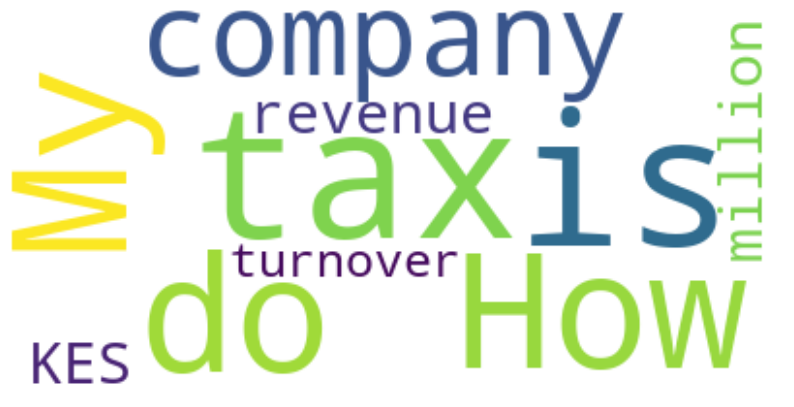

In [4]:
from wordcloud import WordCloud

# إنشاء السحابة الكلمات الرئيسية
wordcloud = WordCloud(stopwords='english', background_color='white', max_words=10).generate(' '.join(text_data))

# عرض السحابة
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pip install scikit-learn matplotlib wordcloud
